In [163]:
!wget https://www.datahub.io/machine-learning/mushroom/r/mushroom.csv

--2023-08-15 16:42:49--  https://www.datahub.io/machine-learning/mushroom/r/mushroom.csv
Resolving www.datahub.io (www.datahub.io)... 172.67.157.38, 104.21.40.221, 2606:4700:3030::ac43:9d26, ...
Connecting to www.datahub.io (www.datahub.io)|172.67.157.38|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pkgstore.datahub.io/machine-learning/mushroom/mushroom_csv/data/652524e2d0176fbc16354df92fe91fcd/mushroom_csv.csv [following]
--2023-08-15 16:42:51--  https://pkgstore.datahub.io/machine-learning/mushroom/mushroom_csv/data/652524e2d0176fbc16354df92fe91fcd/mushroom_csv.csv
Resolving pkgstore.datahub.io (pkgstore.datahub.io)... 104.21.40.221, 172.67.157.38, 2606:4700:3033::6815:28dd, ...
Connecting to pkgstore.datahub.io (pkgstore.datahub.io)|104.21.40.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 379652 (371K) [text/csv]
Saving to: ‘mushroom.csv.7’

mushroom.csv.7      100%[===================>] 370.75K  --.-KB/s    in 

In [164]:
import pandas as pd
data = pd.read_csv("/content/mushroom.csv")

In [165]:
data.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [166]:
# Due to a large number of missing values in stalk-root, this feature has been removed.
data.drop('stalk-root', axis=1, inplace=True)

In [167]:
print(f'data shape: {data.shape}\n')
print(f'Target labels: {data["class"].unique()}\n')
print(f'{data.groupby("class").size()}\n')
print(f'{data.head(5)}')

data shape: (8124, 22)

Target labels: ['p' 'e']

class
e    4208
p    3916
dtype: int64

  cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0         x           s         n          t    p               f   
1         x           s         y          t    a               f   
2         b           s         w          t    l               f   
3         x           y         w          t    p               f   
4         x           s         g          f    n               f   

  gill-spacing gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0            c         n          k           e  ...                      w   
1            c         b          k           e  ...                      w   
2            c         b          n           e  ...                      w   
3            c         n          n           e  ...                      w   
4            w         b          k           t  ...                      w   

  stalk-color-below-

Check for null values

### Feature Analysis
Insights into features

In [168]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


In [169]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [170]:
#data.hist(figsize=(20,15))

Correlation between features

In [171]:
data.corr()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.052951
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.178446
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.031384
bruises%3F,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.501530
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.093552
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.129200
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,-0.348387
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.540024
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.530566
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,0.223439,0.235794,NaN,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216,-0.102019


In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [173]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

# Scale data between -1 and 1
# Bringing the mean to 0 and variance to 1, so as to have a non-noisy optimization
standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [174]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [175]:
y_pred = lr.predict(X_test)
print(f'accuracy: {lr.score(X_test, y_test)}')

accuracy: 0.9507692307692308


In [176]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[810  35]
 [ 45 735]]


In [177]:
import torch
import numpy as np

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.values.astype(np.float32))
y_test = torch.from_numpy(y_test.values.astype(np.float32))

# As y must be in the form of column tensor rather a row tensor, it has to be transformed.
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [178]:
import torch
import torch.nn as nn

class LogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear1 = nn.Linear(in_features=n_input_features, out_features=20, bias=True)
    self.linear2 = nn.Linear(in_features=20, out_features=20, bias=True)
    self.linear3 = nn.Linear(in_features=20, out_features=1, bias=True)

  # Sigmoid transformation of the input
  def forward(self, x):
    y_pred = self.linear1(x)
    y_pred = self.linear2(y_pred)
    y_pred = torch.sigmoid(input=self.linear3(y_pred))
    return y_pred

In [179]:
n_samples, n_features = X_train.shape
model = LogisticRegression(n_features)

In [180]:
num_epochs = 500
learning_rate = 0.0001

loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

In [181]:
for epoch in range(num_epochs):
  y_pred = model(X_train)
  loss = loss_fn(y_pred, y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if (epoch+1) % 20 == 0:
    print(f'epoch={epoch+1} | loss={loss.item():.4f}')

epoch=20 | loss=0.6945
epoch=40 | loss=0.6943
epoch=60 | loss=0.6941
epoch=80 | loss=0.6939
epoch=100 | loss=0.6937
epoch=120 | loss=0.6935
epoch=140 | loss=0.6933
epoch=160 | loss=0.6931
epoch=180 | loss=0.6929
epoch=200 | loss=0.6927
epoch=220 | loss=0.6925
epoch=240 | loss=0.6923
epoch=260 | loss=0.6921
epoch=280 | loss=0.6919
epoch=300 | loss=0.6917
epoch=320 | loss=0.6915
epoch=340 | loss=0.6913
epoch=360 | loss=0.6910
epoch=380 | loss=0.6908
epoch=400 | loss=0.6906
epoch=420 | loss=0.6904
epoch=440 | loss=0.6902
epoch=460 | loss=0.6900
epoch=480 | loss=0.6898
epoch=500 | loss=0.6896


In [182]:
with torch.no_grad():
  y_prob = model(X_test)
  y_pred = y_prob.round()
  acc = y_pred.eq(y_test).sum() / y_test.shape[0]
  print(f'Accuracy= {acc.item():.4f}')

Accuracy= 0.4302


In [183]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         0.0       0.45      0.40      0.42       845
         1.0       0.42      0.46      0.44       780

    accuracy                           0.43      1625
   macro avg       0.43      0.43      0.43      1625
weighted avg       0.43      0.43      0.43      1625



### Confusion Matrix

In [184]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[341 504]
 [422 358]]


In [185]:
from sklearn.metrics import roc_auc_score

y_test = y_test.detach().numpy()
y_prob = y_prob.detach().numpy()
roc_score = roc_auc_score(y_test, y_prob)

roc_score

0.4844393870429373

In [186]:
from sklearn.metrics import roc_curve, auc

true_positive_rate, false_positive_rate, thresholds = roc_curve(y_true=y_test, y_score=y_pred)

roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

0.5687376725838265

Text(0.5, 0, 'False Positive Rate')

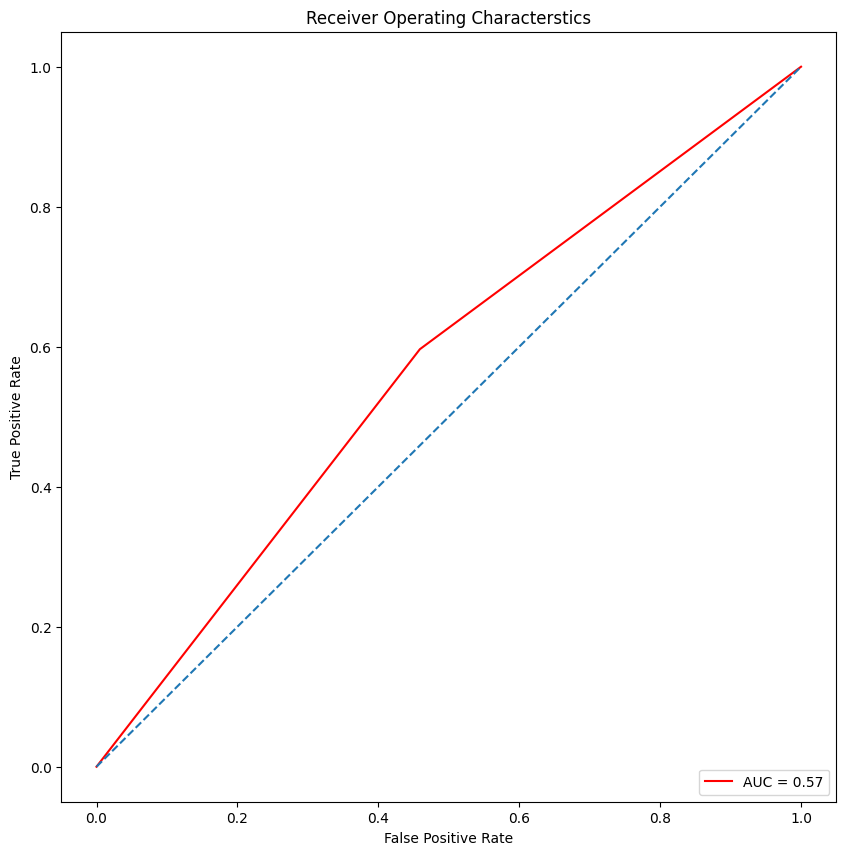

In [187]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characterstics')
plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')